# Aunalytics Data Science Exercise Problem 1

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

In [2]:
#Reading in the training data
au_train = pd.read_csv("au_train.csv")
au_train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Exploratory Data Analysis

#### Continuous Variables

- `education-num` will not be used as it is a coded numeric indicator for `education`
    - Note: This variable will be put back into the final model. An explanation will be given when this is done later.
- `fnlwgt` will not be used as it allocates similar weights to people with similar demographic characteristics and therefore will not be useful for prediction.

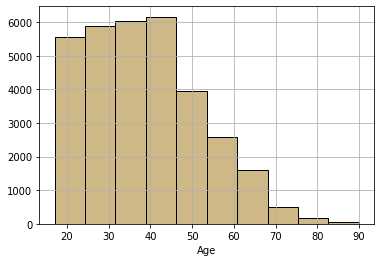

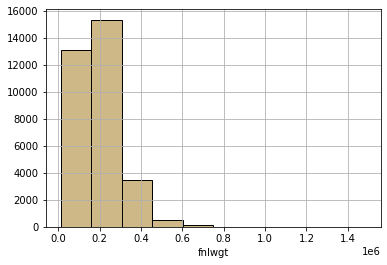

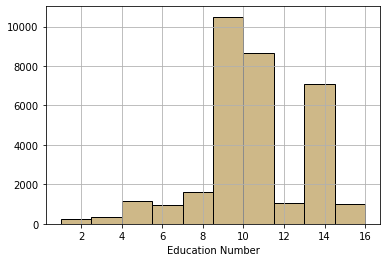

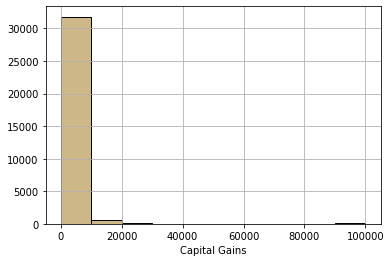

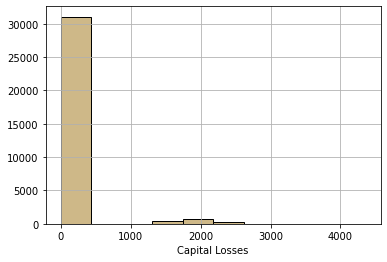

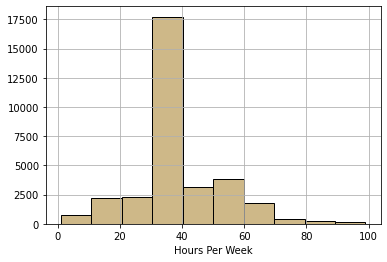

In [3]:

#Age
au_train["age"].hist(edgecolor = "black", color="#ceb888")
plt.xlabel("Age")
plt.show()
#fnlwgt
au_train["fnlwgt"].hist(edgecolor = "black", color ="#ceb888")
plt.xlabel("fnlwgt")
plt.show()
#Education Number
au_train["education-num"].hist(edgecolor = "black", color="#ceb888")
plt.xlabel("Education Number")
plt.show()
#Capital Gains
au_train["capital-gain"].hist(edgecolor = "black", color="#ceb888")
plt.xlabel("Capital Gains")
plt.show()
#Capital Losses
au_train["capital-loss"].hist(edgecolor = "black", color="#ceb888")
plt.xlabel("Capital Losses")
plt.show()
#Capital Gains
au_train["hours-per-week"].hist(edgecolor = "black", color="#ceb888")
plt.xlabel("Hours Per Week")
plt.show()

#### Discrete Variables

Dependent Variable: `class_bin`

In [4]:
print(au_train["class"].value_counts())
print("The percentage of people who made ≤ 50K in the training data is "+str(round(24720/(24720 + 7841), 4))+".")

 <=50K    24720
 >50K      7841
Name: class, dtype: int64
The percentage of people who made ≤ 50K in the training data is 0.7592.


Independent Variables:

- `workclass`
- `education`
- `marital-status`
- `occupation`
- `relationship`
- `race`
- `sex`
- `native-country`

In [5]:
#Work Class
print(au_train["workclass"].value_counts())
#Comparison of groups
au_train.groupby("workclass").mean()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
workclass,,,,,,
?,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


In [6]:
#Education
print(au_train["education"].value_counts())
#Comparison of groups
au_train.groupby("education").mean()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [7]:
#Marital Status
print(au_train["marital-status"].value_counts())
#Comparison of groups
au_train.groupby("marital-status").mean()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
marital-status,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


In [8]:
#Occupation
print(au_train["occupation"].value_counts())
#Comparison of groups
au_train.groupby("occupation").mean()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669


In [9]:
#Relationship
print(au_train["relationship"].value_counts())
#Comparison of groups
au_train.groupby("relationship").mean()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


In [10]:
#Race
print(au_train["race"].value_counts())
#Comparison of groups
au_train.groupby("race").mean()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


In [11]:
#Sex
print(au_train["sex"].value_counts())
#Comparison of groups
au_train.groupby("sex").mean()

 Male      21790
 Female    10771
Name: sex, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


In [12]:
#Native Country
au_train["native-country"].value_counts()


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Dummy Variable Creation

#### `class`

I will redefine the dependent variable to make it easier to work with. I have made a new variable called `Class` to contain the binary indicator where...

- $>$ $50,000 = 1 (As this is what we are trying to predict.)
- $\le$ $50,000 = 0

#### `sex`

As `sex` is a binary variable, I will change it to a binary indicator variable `Sex` where...

- `Male` = 1
- `Female` = 0

#### `native-country`

I will create a new variable for this category since almost 90% of the data comes from US native people. There are 40 other countries and an "unknown" response (`?`), which means I would need to code in 41 dummy variables which would make the model quite complicated. By choosing to do a binary US/Non-US native variable, I reduce the number of dummy variables needed to one. I will include any `?` in the "Not US" designation since the person cannot say they are native to the US. For the new variable `US`...

- = 1 if the person is native to the US
- = 0 if the person is not native to the US or does not know

For the rest of the categorical variables, I will create dummy variables for all categories.

In [13]:
#Binary dependent variable
au_train["Class"] = np.where(au_train["class"] == " >50K", 1, 0)
#Dummy Variable Coding for Gender; Male = 1, Female = 0
au_train["Sex"] = np.where(au_train["sex"] == " Male", 1, 0)
#Binary US variable
au_train["US"] = np.where(au_train["native-country"] == " United-States", 1, 0)
#Creating dummy variables for remaining categorical variables
cat_var = ["workclass","education","marital-status","occupation","relationship","race"]
for var in cat_var:
    cat_list = 'var'+'_'+ var
    cat_list = pd.get_dummies(au_train[var], prefix=var)
    temp1 = au_train.join(cat_list)
    au_train = temp1
#Variables to keep for model
data_vars = au_train.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_var]
au_train_final = au_train[to_keep]
au_train_final = au_train_final.drop(["sex","native-country","class"], axis=1)

au_train_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Class,Sex,US,workclass_ ?,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,2174,0,40,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,40,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Logistic Regression Model

### Baseline Categorical Decisions

Baselines for the categorical variables with more than two categories were chosen as follows.

- `workclass` and `occupation`: The `?` level was chosen for the baseline. I chose this because there was no hierarchy and `?` was different than all the other categories. If a person knows their work class and occupation, then that would be valuable information. Putting `?` (unknown) does not give us any interpretable meaning in the context of our data.
- `marital-status`, `relationship`, and `race`: The baseline level chosen for these variables was the most frequent level. There was no hierarchy within these variables so I choose the largest occuring (most common) to be the baseline.
- `education`: `Preschool` was chosen as the baseline level as it is the lowest education possible from the data. Therefore it is easier to compare the other `education` coefficients because they show the change in the log-odds (which we can then use to find the change in probability) of whether a person makes over $50,000 a year.

In [14]:
#Indpendent Variables
X = au_train_final.drop(["Class","education-num","fnlwgt"], axis=1)
#Removing Baseline Categories in categorical variables
X = X.drop(["workclass_ ?","education_ Preschool","marital-status_ Married-civ-spouse","occupation_ ?","relationship_ Husband","race_ White"], axis=1)
#Dependent Variable
Y = au_train["Class"]
#First Model
model1 = sm.Logit(Y,sm.add_constant(X))
results1 = model1.fit()
print(results1.summary2())

         Current function value: 0.317231
         Iterations: 35
                                            Results: Logit
Model:                           Logit                        Pseudo R-squared:             0.425     
Dependent Variable:              Class                        AIC:                          20774.7037
Date:                            2023-03-30 09:18             BIC:                          21261.3742
No. Observations:                32561                        Log-Likelihood:               -10329.   
Df Model:                        57                           LL-Null:                      -17974.   
Df Residuals:                    32503                        LLR p-value:                  0.0000    
Converged:                       0.0000                       Scale:                        1.0000    
No. Iterations:                  35.0000                                                              
---------------------------------------------------

c:\Users\Paul Holaway\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Complete Separation Issue

There are signs of complete or quasi-complete separation for some variables in our model. We have many common signs such as large coefficient standard errors and a unusually large iteration count. Many coefficients have `nan` for SE and Z-scores/p-values too. Therefore I will explore which variables are causing this below so they can be removed from the model. Below is a custom function I created to make a plot to help me identify a variable with complete or quasi-complete separation. It will create a single variable logistic regression model for our dependent variable (`Class`) and plot it. If complete separation exists, then there will be one cluster of predictions that are less than 0 (at 0 or 1), and another that are more than 0 (at 1 or 0). If quasi-complete separation exists, then there will be clusters on the vertical line of $X=0$.

In [15]:
def sep_catVar_test(x, y):
    x = np.array(x)
    if x.ndim == 1:
        x = x.reshape(-1,1)
    m = LogisticRegression()
    m.fit(x,y)
    plt.scatter(m.predict(x),y)

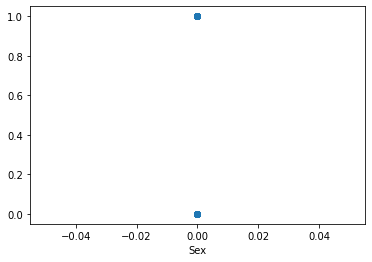

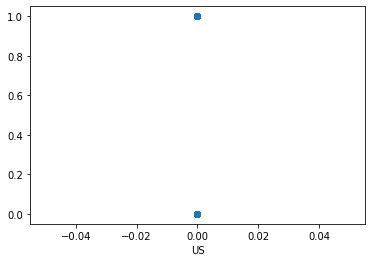

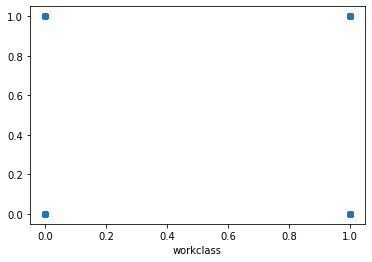

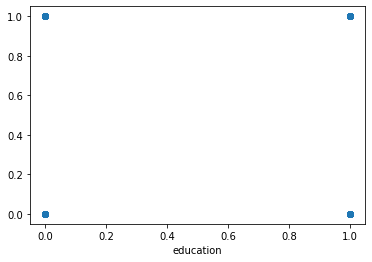

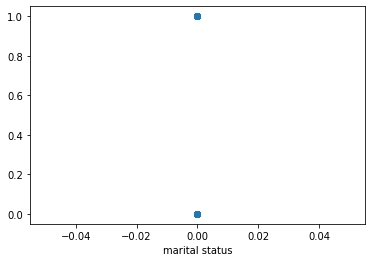

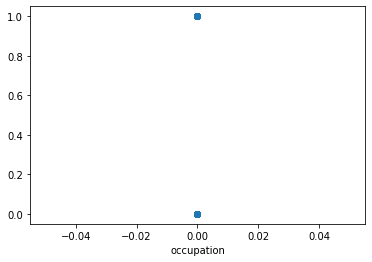

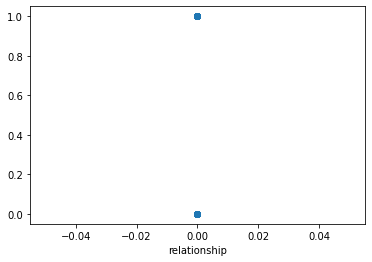

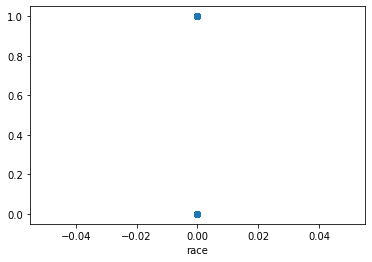

In [16]:
sep_catVar_test(X["Sex"],au_train_final["Class"])
plt.xlabel("Sex")
plt.show()
sep_catVar_test(X["US"],au_train_final["Class"])
plt.xlabel("US")
plt.show()
#workclass
sep_catVar_test(X.iloc[:,6:14], au_train_final["Class"])
plt.xlabel("workclass")
plt.show()
#education
sep_catVar_test(X.iloc[:, 14:29], au_train_final["Class"])
plt.xlabel("education")
plt.show()
#marital status
sep_catVar_test(X.iloc[:, 29:35], au_train_final["Class"])
plt.xlabel("marital status")
plt.show()
#occupation
sep_catVar_test(X.iloc[:, 35:49], au_train_final["Class"])
plt.xlabel("occupation")
plt.show()
#relationship
sep_catVar_test(X.iloc[:, 49:54], au_train_final["Class"])
plt.xlabel("relationship")
plt.show()
#race
sep_catVar_test(X.iloc[:, 54:58], au_train_final["Class"])
plt.xlabel("race")
plt.show()

As we can see above, all eight categorical variables show quasi-complete separation. Therefore we should remove them from the logistic regression model.

In [17]:
#Removing Categorical Variables
X = X.iloc[:, 0:4]
#Second Model without quasi-complete seperation variables
model2 = sm.Logit(Y,sm.add_constant(X))
results2 = model2.fit()
print(results2.summary2())

Optimization terminated successfully.
         Current function value: 0.447148
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.190     
Dependent Variable: Class            AIC:              29129.1416
Date:               2023-03-30 09:18 BIC:              29171.0960
No. Observations:   32561            Log-Likelihood:   -14560.   
Df Model:           4                LL-Null:          -17974.   
Df Residuals:       32556            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -4.9294   0.0784 -62.9074 0.0000 -5.0830 -4.7759
age               0.0392   0.0011  34.9786 0.0000  0.0370  0.0414


In [18]:
model2 = LogisticRegression(penalty="none")
model2.fit(X,Y)

au_test = pd.read_csv("au_test.csv")
Xtest = au_test[["age","capital-gain","capital-loss","hours-per-week"]]
#Binary dependent variable
au_test["Class"] = np.where(au_test["class"] == " >50K.", 1, 0)
Ytest = au_test["Class"]
Ypred = model2.predict(Xtest)
#Accuracy
print("The accuracy of the model is " + str(round(model2.score(Xtest,Ytest), 4)) + ".")
#Confusion Matrix
cm = confusion_matrix(Ytest, Ypred)
print("The confusion matrix for our model is...")
print(cm)

The accuracy of the model is 0.7989.
The confusion matrix for our model is...
[[11921   514]
 [ 2760  1086]]


In [19]:
print(au_test["class"].value_counts())
print("The percentage of people who made ≤ 50K in the testing data is "+str(round(12435/(12435 + 3846), 4))+".")

 <=50K.    12435
 >50K.      3846
Name: class, dtype: int64
The percentage of people who made ≤ 50K in the testing data is 0.7638.


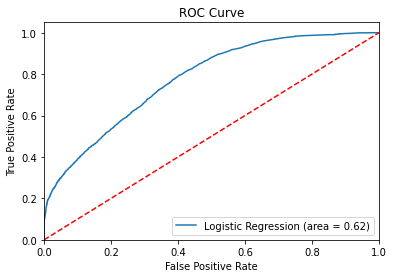

In [20]:
auc = roc_auc_score(Ytest, model2.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, model2.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = "Logistic Regression (area = %0.2f)" %auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.show()

We notice that using this model, we have a good **accuracy score of 79.89%**. This means that almost 80% of our predictions using this model were correct. I was able to correctly predict 11,921 people to make ≤50K and 1,086 people to make >50K. However, I incorrectly predict 514 people to make ≤50K, but actually make >50K, and 2,760 to make >50K, but actually make ≤50K. Finally, we see that the **AUC = 0.62**, which is not that good. This means that the model may not be that great at predicting if the person will make > or ≤ 50K on new data. I will make one final attempt to see if the model can be improved. I removed `education-num` from the original model as it did not hold any meaning given I kept `education` in. Now I will add `education-num` back into the model to see if it can improve model performance.

In [21]:
#New training data including education-num
X2 = au_train[["age","capital-gain","education-num","capital-loss","hours-per-week"]]
#Binary dependent variable
Y2 = au_train["Class"]
#Third Model adding education-num back in
model3 = sm.Logit(Y2,sm.add_constant(X2))
results3 = model3.fit()
print(results3.summary2())

Optimization terminated successfully.
         Current function value: 0.406725
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.263     
Dependent Variable: Class            AIC:              26498.7178
Date:               2023-03-30 09:18 BIC:              26549.0630
No. Observations:   32561            Log-Likelihood:   -13243.   
Df Model:           5                LL-Null:          -17974.   
Df Residuals:       32555            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -8.3157   0.1151 -72.2399 0.0000 -8.5413 -8.0900
age               0.0430   0.0012  35.2114 0.0000  0.0406  0.0454


In [22]:
model3 = LogisticRegression(penalty="none")
model3.fit(X2,Y2)

Xtest2 = au_test[["age","capital-gain","education-num","capital-loss","hours-per-week"]]
#Binary dependent variable
Ytest2 = au_test["Class"]
Ypred2 = model3.predict(Xtest2)
#Accuracy
print("The accuracy of the model is " + str(round(model3.score(Xtest2,Ytest2), 4)) + ".")
#Confusion Matrix
cm2 = confusion_matrix(Ytest2, Ypred2)
print("The confusion matrix for our model is...")
print(cm2)

The accuracy of the model is 0.8128.
The confusion matrix for our model is...
[[11742   693]
 [ 2354  1492]]


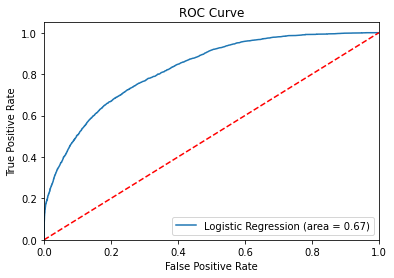

In [23]:
auc2 = roc_auc_score(Ytest2, model3.predict(Xtest2))
fpr2, tpr2, thresholds2 = roc_curve(Ytest2, model3.predict_proba(Xtest2)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label = "Logistic Regression (area = %0.2f)" %auc2)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.show()

We notice that using this model, we have a better **accuracy score of 81.28%**. This means that 81.28% of our predictions using this model were correct. I was able to correctly predict 11,742 people to make ≤50K and 1,492 people to make >50K. However, I incorrectly predict 693 people to make ≤50K, but actually make >50K, and 2,354 to make >50K, but actually make ≤50K. Finally, we see that the **AUC = 0.67**, which is better than before. While the model may still not be that great at predicting if the person will make > or ≤ 50K, it is better than before. Therefore I will leave `education-num` in the final model as both the accuracy and AUC have increased. This makes our final model for predicting whether a person makes over 50K a year will be...

$\boxed{\text{logit(Class)}=-8.3157+0.043\text{ age}+0.0003\text{ capital-gain}+0.3228\text{ education-num}+0.0007\text{ capital-loss}+0.0407\text{ hours-per-week}}$